# Analytics test
## The various steps performed on this data before the fitting of data is done.

#### Univariate analysis
#### NAN identification
#### Variance observation



In [148]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor


In [97]:
features = pd.read_csv('machine.csv')
features.head(10)

,Machine_speed,Machine_state,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
0,46.973335,0,2.499970,2.066773,54.559528,949946.0000,2.991859,98.685355,10730.5,1.525074,56.871289,2.157189
1,46.973335,0,2.497196,2.101614,54.962861,949984.6667,2.992938,98.727884,10731.0,1.508612,56.878337,2.152422
2,46.973335,0,2.499792,2.113061,54.796452,950017.6667,2.996020,98.700322,10732.0,1.514143,56.905778,2.108552
3,46.973335,0,2.499559,2.129736,54.731283,950052.8000,2.996281,98.639509,10732.4,1.488390,56.968360,2.086052
4,46.973335,0,2.500058,2.093854,54.844514,950088.5000,2.988235,98.521231,10733.0,1.509662,57.011485,2.090726
5,46.973335,0,2.501300,2.134929,54.719098,950120.0000,2.991909,98.391523,10734.0,1.516884,57.065533,2.095202
6,46.973335,0,2.500378,2.082958,54.993215,950159.4000,2.999112,98.262201,10734.4,1.492385,57.116243,2.094006
7,46.973335,0,2.499837,1.839825,54.788962,950182.0000,2.992971,98.198697,10735.0,1.505333,57.246765,2.104141
8,46.973335,0,2.499646,1.957902,55.084868,950223.0000,2.998823,98.072553,10736.0,1.511921,57.205077,2.110120
9,46.973335,0,2.498415,2.121513,55.056075,950257.8333,2.989491,97.944455,10736.5,1.476032,57.245964,2.104826


In [114]:
y = features.Machine_state
x = features.drop(['Machine_state'],axis = 1)

### The function below performs the univariate analysis on data

In [116]:
def deep_describe(data):
    cmsq = data.describe()
    
    mode = data.mode(axis = 0,numeric_only=True)
    mode = mode.dropna(axis = 0,how='any')
    mode = mode.set_index([['mode']])
    
    median = pd.DataFrame(data.median()).transpose()
    median = median.set_index([['median']])
    
    variance = pd.DataFrame(x.var(0)).T
    variance = variance.set_index([['variance']])
    
    kurtosis = pd.DataFrame(data.kurtosis()).transpose()
    kurtosis = kurtosis.set_index([['kurtosis']])
    
    skew = pd.DataFrame(data.skew()).transpose()
    skew = skew.set_index([['skewness']])
    
    tr = [cmsq,variance,mode,median,skew,kurtosis]
    return pd.concat(tr)

In [117]:
deep_describe(x)

,Machine_speed,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
count,2988.000000,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2988.000000,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2988.000000
mean,56.056708,2.170996e+00,1.705574e+00,5.451328e+01,9.902124e+05,2.374626,9.629589e+01,10958.558846,1.494842,5.747148e+01,1.324780
std,23.710772,8.353066e-01,6.796562e-01,5.262175e+00,1.965182e+04,1.000699,9.441423e+00,147.473730,0.767476,5.761615e+00,0.545401
min,0.000000,-8.560000e-07,-7.570000e-07,1.370000e-38,9.499460e+05,-0.000002,2.460000e-38,10730.500000,-0.000003,1.450000e-38,-0.018309
25%,50.306629,2.491944e+00,1.974200e+00,5.473029e+01,9.776498e+05,2.249223,9.673316e+01,10872.000000,1.478241,5.712369e+01,1.489610
50%,65.000000,2.498786e+00,1.997653e+00,5.499982e+01,9.937956e+05,2.936472,9.786367e+01,10916.000000,1.504285,5.820497e+01,1.499058
75%,70.000000,2.502232e+00,2.003798e+00,5.525958e+01,1.006039e+06,2.999094,9.837613e+01,11059.000000,1.521707,5.880156e+01,1.502098
max,80.000000,2.972470e+00,2.425751e+00,6.011282e+01,1.022285e+06,3.215173,1.007535e+02,11300.000000,4.151384,6.130416e+01,3.031350
variance,562.200704,6.977371e-01,4.619326e-01,2.769049e+01,3.861939e+08,1.001398,8.914047e+01,21748.501079,0.589019,3.319621e+01,0.297462
mode,65.000000,0.000000e+00,0.000000e+00,1.370000e-38,9.945230e+05,0.000000,2.460000e-38,10916.000000,0.000000,1.450000e-38,0.000000


### The variance in the above data is not to required scale so the scaling is done.

Splitting of the data for testing and training of model in ratio 7:3

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Scaling of data Due to irregular varainces

In [122]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),index=x_train.index.values, columns=x_train.columns.values)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index.values, columns=x_test.columns.values)

c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


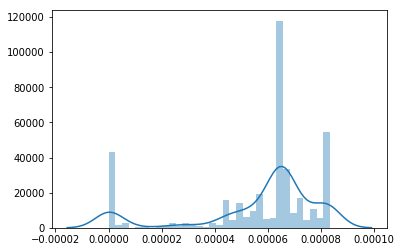

In [218]:
#sns.distplot(x_train_scaled['Machine_speed'])

from sklearn.preprocessing import Normalizer

normal = Normalizer().fit(x_train)
x_train_normalized = pd.DataFrame(normal.transform(x_train),index=x_train.index.values, columns=x_train.columns.values)
df = pd.DataFrame(x_train_normalized['Machine_speed'])
sns.distplot(df)

In [221]:
skew = pd.DataFrame(x.skew()).transpose()
skew = skew.set_index([['skewness']]).apply(np.abs,axis = 1).nlargest()
skew

,Machine_speed,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
skewness,1.451995,2.178295,1.982022,9.797014,0.501922,1.655724,9.365463,0.634671,0.024143,8.743522,1.536416


#### Principal component analysis (PCA).
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [ ]:
pca = PCA()
pca.fit(x_train)
cpts = pd.DataFrame(pca.transform(x_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(x_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(x_train_scaled))

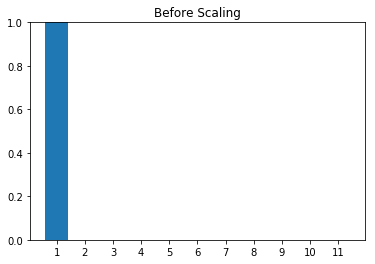

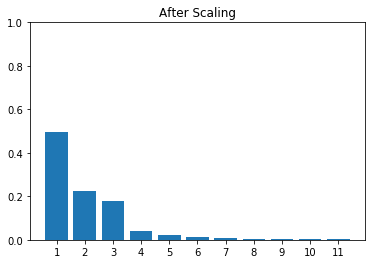

,0
0,Machine_speed
1,M12_ENZYME_FLOW
2,M12_STABILIZER_FLOW
3,M12_TEMPERATURE
4,M12_WATER_NR
5,M12_WETTING_AGENT_FLOW
6,M18_TEMPERATURE
7,M19_RESERVE_NR
8,M19_STABILIZER_FLOW
9,M19_TEMPERATURE


In [129]:
plt.bar(x_axis,pca.explained_variance_ratio_)
plt.xticks(x_axis,x_axis)
plt.ylim(0,1)
plt.title('Before Scaling')
plt.show()

plt.bar(x_axis,pca_scaled.explained_variance_ratio_)
plt.xticks(x_axis,x_axis)
plt.ylim(0,1)
plt.title('After Scaling')
plt.show()

pd.DataFrame(x_train.columns)

## REGRESSION BEFORE SCALING

Area under ROC Curve:  0.5642857142857143


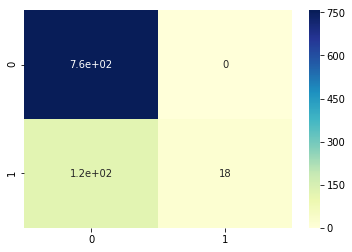

In [145]:
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)
pd.DataFrame(logit.coef_,columns = x.columns).T
pred = logit.predict(x_test)
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
cm = pd.DataFrame(confusion_matrix(y_test,pred))
sns.heatmap(cm,annot = True,cmap="YlGnBu")
pd.DataFrame(logit.coef_,columns = x.columns,index= ['coefficients']).T

fpr_unsc, tpr_unsc, _ = roc_curve(y_test,pred) 

Area under ROC Curve:  0.9964285714285714


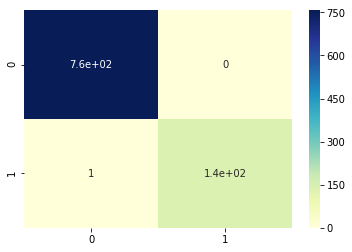

In [146]:
logit = LogisticRegression()
logit = logit.fit(x_train_scaled,y_train)
pd.DataFrame(logit.coef_,columns = x.columns).T
pred = logit.predict(x_test_scaled)
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

sns.heatmap(cm,annot = True,cmap="YlGnBu")
pd.DataFrame(logit.coef_,columns = x.columns,index= ['coefficients']).T

fpr_sc, tpr_sc, _ = roc_curve(y_test,pred) 

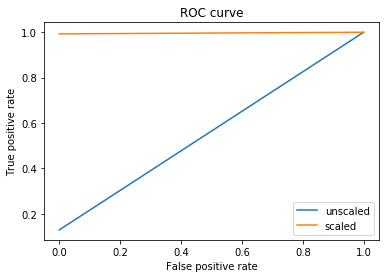

In [147]:
plt.plot(fpr_unsc, tpr_unsc, label='unscaled')
plt.plot(fpr_sc, tpr_sc, label='scaled')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Random Forest

In [166]:
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(x_train_scaled, y_train);

#### creating models with different hyperparameters to try and boost performance

In [167]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

Area under ROC Curve:  0.9964285714285714


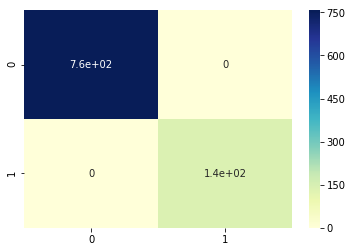

In [183]:
predict = rf.predict(x_test_scaled)
cm = pd.DataFrame(confusion_matrix(y_test,predict))
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
sns.heatmap(cm,annot = True,cmap="YlGnBu")

In [184]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydotplus

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = x_test.columns, rounded = True, precision = 1)

